<a href="https://colab.research.google.com/github/BharathKrishna29/major-project/blob/main/new_major_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/covid_19_data.csv')
df.head()

In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])

In [ ]:
#gatting usa data for doing tablau part 
df_x = df[df['Country/Region'] == 'US']
df_x.head()
df_x.to_csv('USA_data.csv',index=False)
import numpy as np
np.min(df_x['Confirmed'])
df_x.loc[df['Confirmed'] == 0.0]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2348,2349,2020-02-24,"Lackland, TX (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0
2349,2350,2020-02-24,"Omaha, NE (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0
2350,2351,2020-02-24,"Travis, CA (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0
2444,2445,2020-02-25,"Lackland, TX (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0
2445,2446,2020-02-25,"Omaha, NE (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
303201,303202,2021-05-25,Recovered,US,2021-05-26 04:20:35,0.0,0.0,0.0
303966,303967,2021-05-26,Recovered,US,2021-05-27 04:20:59,0.0,0.0,0.0
304731,304732,2021-05-27,Recovered,US,2021-05-28 04:20:36,0.0,0.0,0.0
305496,305497,2021-05-28,Recovered,US,2021-05-29 04:20:41,0.0,0.0,0.0


In [ ]:
#gating india data for doing  tableu part
df_x = df[df['Country/Region'] == 'India']
df_x.head()
df_x.to_csv('india_data.csv',index=False)
import numpy as np
np.min(df_x['Confirmed'])
df_x.loc[df['Confirmed'] == 0.0]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
74333,74334,2020-07-27,Unknown,India,2021-04-02 15:13:53,0.0,0.0,0.0
74821,74822,2020-07-28,Lakshadweep,India,2021-04-02 15:13:53,0.0,0.0,0.0
75080,75081,2020-07-28,Unknown,India,2021-04-02 15:13:53,0.0,0.0,0.0
75568,75569,2020-07-29,Lakshadweep,India,2021-04-02 15:13:53,0.0,0.0,0.0
75827,75828,2020-07-29,Unknown,India,2021-04-02 15:13:53,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
303306,303307,2021-05-25,Unknown,India,2021-05-26 04:20:35,0.0,0.0,0.0
304071,304072,2021-05-26,Unknown,India,2021-05-27 04:20:59,0.0,0.0,0.0
304836,304837,2021-05-27,Unknown,India,2021-05-28 04:20:36,0.0,0.0,0.0
305601,305602,2021-05-28,Unknown,India,2021-05-29 04:20:41,0.0,0.0,0.0


In [ ]:

df = df.drop( ['SNo']  ,axis = 1)
df.head()


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


##=> ***NOW WE ARE PLOTING THE GRAPH OF DATA USING MATPLOTLIB***


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))


plt.plot(df['ObservationDate'].sort_values() , df['Deaths'] , color='r')

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['ObservationDate'].sort_values() , df['Recovered'] , color='g')

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

plt.plot(df['ObservationDate'].sort_values() , df['Confirmed'] , color= 'b')


##=> ***NOW WE ARE DOING THE FORCASTING FOR CONFIRMED CASES***


In [ ]:
df1 = df.iloc[:,[0,4]]
df1

,ObservationDate,Confirmed
0,2020-01-22,1.0
1,2020-01-22,14.0
2,2020-01-22,6.0
3,2020-01-22,1.0
4,2020-01-22,0.0
...,...,...
306424,2021-05-29,102641.0
306425,2021-05-29,29147.0
306426,2021-05-29,1364.0
306427,2021-05-29,87550.0


In [ ]:
df1 = df1.rename(columns ={'Confirmed':'y','ObservationDate':'ds'})

In [ ]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95 ,daily_seasonality=True,yearly_seasonality=True)
model.fit(df1)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot1 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


In [ ]:
plot2 = model.plot_components(prediction)

=> ***now we are doing cross valition of our data to find out how much error are occers in our forcating data***

In [ ]:
#cross validation 
#we have a data from 2020-01 to 2021-06
#2020-01 to 2020-09 - training part
#2020-09 to 2021-06 - testing part
#future data is 30 day our - validation

In [ ]:
df1['ds'].nunique()

494

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='200 days' ,period='15 days' ,horizon='30 days')
df_cv.head()
df_cv.shape

INFO:fbprophet:Making 18 forecasts with cutoffs between 2020-08-17 00:00:00 and 2021-04-29 00:00:00


(410049, 6)

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv ,metric='mse')
fig = plot_cross_validation_metric(df_cv ,metric='mdape')
fig = plot_cross_validation_metric(df_cv ,metric='rmse')
fig = plot_cross_validation_metric(df_cv ,metric='coverage')


***=>•Which country/state is having highest number of cases?***

***run*** this shell : 

In [ ]:
import numpy as np
array = np.unique(df['Country/Region'])
df['Country/Region'].value_counts()
list1 = []
list2 = []
for i in range(0,229):
  df_count = df[df['Country/Region'] == array[i]]
  sum = df_count['Confirmed'].sum()
  list1.append(sum)
  list2.append(array[i])
data_cnf = pd.DataFrame(list(zip(list2,list1)), columns=['country','confirmedcases'])
data_cnf.head()
data_cnf.to_csv('confiremed_cases.csv',index=False)
print("THE HIGHEST CONFIREMED_CASES ARE : {0} ".format(np.max(data_cnf['confirmedcases'])))
data_cnf.loc[data_cnf['confirmedcases'] == np.max(data_cnf['confirmedcases']) ]


THE HIGHEST CONFIREMED_CASES ARE : 6049145667.0 


,country,confirmedcases
214,US,6.049146e+09


**=> •Which country/state is having lowest number of cases?**

***run this shell : ***

In [ ]:
print("THE LOWEST CONFIREMED_CASES ARE : {0} ".format(np.min(data_cnf['confirmedcases'])))
data_cnf.loc[data_cnf['confirmedcases'] == np.min(data_cnf['confirmedcases']) ]

THE LOWEST CONFIREMED_CASES ARE : 0.0 


,country,confirmedcases
43,China,0.0


# **NOW WE ARE FORCASTING FOR TOTAL DEATHS** 

In [ ]:
df2 = df.iloc[:,[0,5]]
df2

In [ ]:
df2 = df2.rename(columns ={'Deaths':'y','ObservationDate':'ds'})

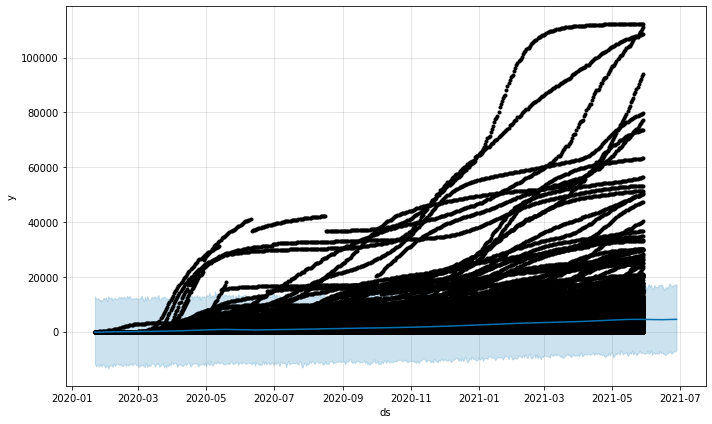

In [ ]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95,daily_seasonality=True,yearly_seasonality=True)
model.fit(df2)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot3 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


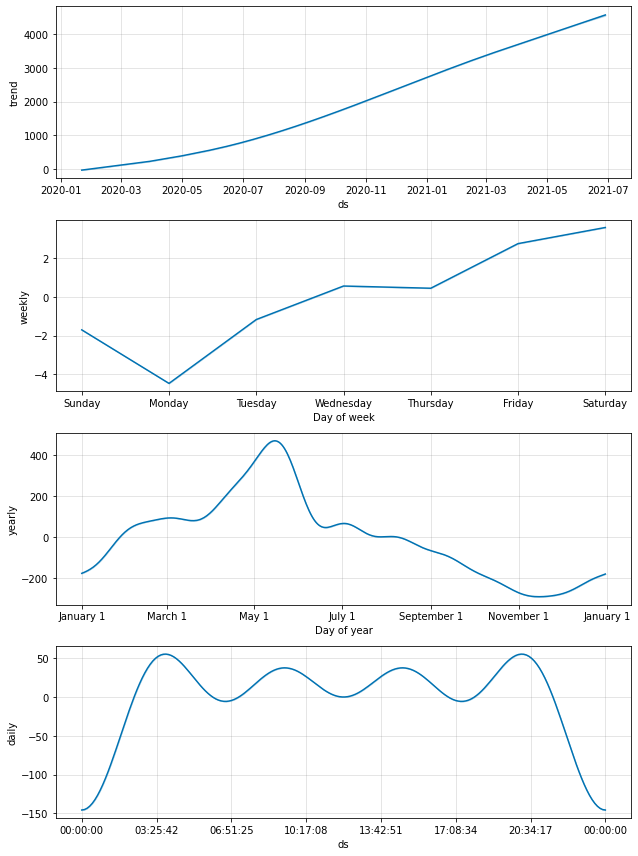

In [ ]:
plot4 = model.plot_components(prediction)

**=>•Which country/state is having highest number of deaths?**

In [ ]:
import numpy as np
array = np.unique(df['Country/Region'])
df['Country/Region'].value_counts()
list3 = []
list4 = []
for i in range(0,229):
  df_death = df[df['Country/Region'] == array[i]]
  sum = df_death['Deaths'].sum()
  list3.append(sum)
  list4.append(array[i])
data_ded = pd.DataFrame(list(zip(list4,list3)), columns=['country','Deaths'])
data_ded.head()
data_ded.to_csv('total_deaths.csv',index=False)
print("THE HIGHEST Deaths  ARE : {0} ".format(np.max(data_ded['Deaths'])))
data_ded.loc[data_ded['Deaths'] == np.max(data_ded['Deaths']) ]


THE HIGHEST Deaths  ARE : 123303762.0 


,country,Deaths
214,US,123303762.0


**=>•Which country/state is having lowest number of deaths?**

In [ ]:
print("THE LOWEST DEATHS ARE : {0} ".format(np.min(data_ded['Deaths'])))
data_ded.loc[data_ded['Deaths'] == np.min(data_ded['Deaths']) ]

# ***here we are forcating the recoverd cases***

In [ ]:
df3 = df.iloc[:,[0,6]]
df3

In [ ]:
df3 = df3.rename(columns ={'Recovered':'y','ObservationDate':'ds'})

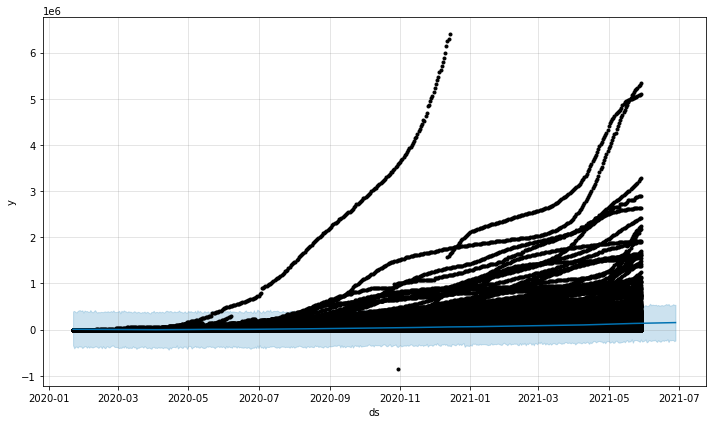

In [ ]:
from fbprophet import Prophet
#dir(Prophet)
model = Prophet(interval_width=0.95,daily_seasonality=True , yearly_seasonality=True)
model.fit(df3)
model.component_modes
future_dates = model.make_future_dataframe(periods=30,freq='D',include_history=True)
prediction = model.predict(future_dates)
#prediction.head()
plot6 = model.plot(prediction[['ds','yhat_lower','trend','yhat_upper','yhat']])


In [ ]:
plot5 = model.plot_components(prediction)

***=> which country/state is having highest people recoverd ***

In [ ]:
import numpy as np
array = np.unique(df['Country/Region'])
df['Country/Region'].value_counts()
list5 = []
list6 = []
for i in range(0,229):
  df_recov = df[df['Country/Region'] == array[i]]
  sum = df_recov['Deaths'].sum()
  list5.append(sum)
  list6.append(array[i])
data_rec = pd.DataFrame(list(zip(list6,list5)), columns=['country','recover'])
data_rec.head()
data_rec.to_csv('total_recover.csv',index=False)
print("THE HIGHEST RECOVERD  ARE : {0} ".format(np.max(data_rec['recover'])))
data_rec.loc[data_rec['recover'] == np.max(data_rec['recover']) ]


THE HIGHEST RECOVERD  ARE : 123303762.0 


,country,recover
214,US,123303762.0


***=> which country/state is having lowest people recoverd ***

In [ ]:
print("THE LOWEST recover ARE : {0} ".format(np.min(data_rec['recover'])))
data_rec.loc[data_rec['recover'] == np.min(data_rec['recover'])]

THE LOWEST recover ARE : 0.0 


,country,recover
0,Azerbaijan,0.0
1,"('St. Martin',)",0.0
10,Aruba,0.0
15,"Bahamas, The",0.0
37,Cape Verde,0.0
38,Cayman Islands,0.0
41,Channel Islands,0.0
43,China,0.0
51,Curacao,0.0
57,Dominica,0.0
